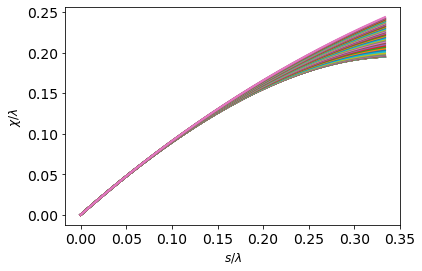

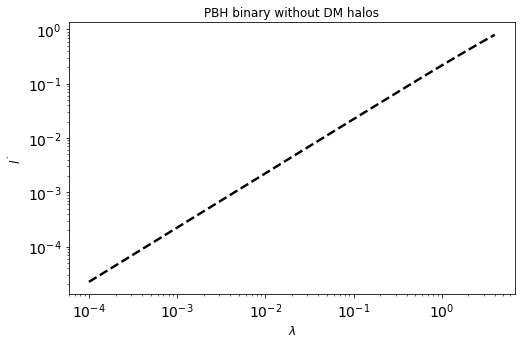

In [1]:
# Tidal torque exerted by the neighbouring PBH in the PBH binaries without dark matter 
# halos and decoupling around matter-radiation equality.


# Solution of eq.(14) using eq.(6) for PBH binaries without DM halos given in paper 
# "The merger rate of primordial-black-hole binaries".


#Variation of  l^{'} with λ for the PBH binary without DM halos decoupling 
# around matter-radiation equality.


import numpy as np
from scipy.integrate import odeint
import math
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

π=np.pi
t_eq=1.59246e12       # in units of seconds
rho_eq=2.15368e-16    # in units of kg.m^-3
G=6.67e-11            # in units of m^3.kg^-1.s^-2
a_eq=2.9374e-4        # scale factor corresponding to matter radiation equality




λ_list=[0.0001,0.0002,0.0003,0.0004,0.0005,0.0006,0.0007,0.0008,0.0009,0.001,0.002,0.003,0.004,
          0.005,0.006,0.007,0.008,0.009,0.01,0.02,0.03,0.04,0.05,0.06,0.07,0.08,0.09,0.1,0.2,0.3,
        0.4,0.5,0.6,0.7,0.8,0.9,1.0,1.1,1.2,1.3,1.4,1.5,1.6,1.7,1.8,1.9,2.0,2.1,2.2,2.3,2.4,2.5,2.6,
        2.7,2.8,2.9,3.0,3.1,3.2,3.3,3.4,3.5,3.6,3.7,3.8,3.9,4.0]


def h(s):
    return math.sqrt((s**-3)+(s**-4)) 

def g(s):
    return  -((3*s+4)/(2*h(s)*(s**5))) #g(s)=h'(s).

def H(s):
    return (1/((s**4)*h(s)))



        
def integral(λ_0):
    def f(u,s,λ_0):
        return [u[1], -((s*g(s)+h(s))*((s*u[1]-u[0]))/(h(s)*s**2))-((u[0])/((((h(s)*s)**2))*λ_0
                     *((u[0]**2+b**2)**(3/2))))]    
    separation0= [1e-12,1]
    b= (3*λ_0)/100000
    ss= np.linspace(1e-12,(λ_0/3),1000000) 
    us= odeint(f,separation0,ss,args=( λ_0,))
    separations= us[:,0]
    As=ss/λ_0
    Bs=separations/λ_0
    plt.rc('lines', linewidth=2.2)
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)
    plt.plot(As,Bs,'')
    plt.xlabel('$s/λ$',fontsize=12)
    plt.ylabel('$χ/λ$',fontsize=12)
    χ=separations**2
    s_list=ss.tolist()
    H_list=np.zeros(len(s_list))
    for i, s in enumerate(s_list):
        H_list[i] = H(s)
    integrand=( χ*H_list)
    x=np.trapz(integrand,s_list)
    return x
     

l_list=np.zeros(len(λ_list))
for i, (λ_0) in enumerate(λ_list):
    l_list[i] = integral(λ_0)
    

    
    
    
plt.rc('lines', linewidth=2.4)    
plt.figure(figsize=(8,5))
plt.loglog(λ_list,l_list,'k--')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('$λ$',fontsize=12)
plt.ylabel('$l^{´}$',fontsize=12)
plt.title('PBH binary without DM halos')
plt.show()   

p=  
-0.00596 x + 0.2229


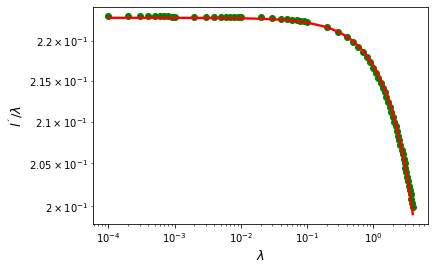

Maximum Percentage error= 0.3965 %


In [2]:
# Fitting of the the curve for the value of l^{'}/λ vs λ for the PBH binary without dark matter 
# halos.

x = np.array(λ_list)
y = np.array(l_list) 
Y = np.array(y/x)



z = np.polyfit(x, Y, 1)
p = np.poly1d(z)
print("p=",p)




plt.loglog(x,Y,'go')
plt.plot(x,p(x),'r')

plt.yscale('log')

plt.xlabel('$λ$',fontsize=13)
plt.ylabel('$l^{´}/λ$',fontsize=13)
plt.show()








#Calculation of the Maximum Percentage error in the numerical and fitted value of l^{´}/λ for
#PBH binary without dark matter halos.
Y_list = Y.tolist()
q= np.array(p(x))
q_list=q.tolist()

def percentage_error(numerical, fitted): 
    return (np.abs((numerical - fitted) / numerical)) * 100



error_list=np.zeros(len(λ_list))

for i, (Y,q) in enumerate(zip(Y_list,q_list)):
    error_list[i] = percentage_error(Y, q)    #Percentage error 


error_max=np.max(error_list)
print("Maximum Percentage error= "'%0.4f'%error_max,"%")

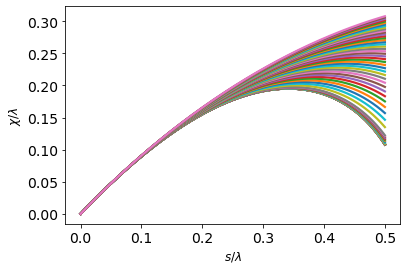

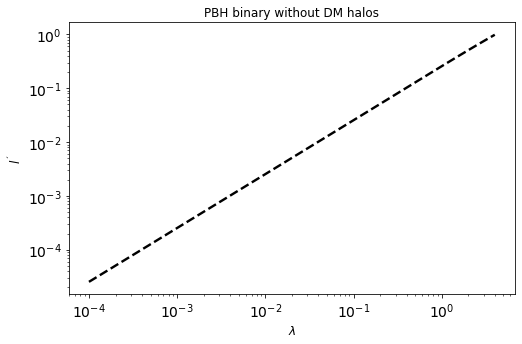

In [12]:
def integral(λ_0):
    def f(u,s,λ_0):
        return [u[1], -((s*g(s)+h(s))*((s*u[1]-u[0]))/(h(s)*s**2))-((u[0])/((((h(s)*s)**2))*λ_0
                     *((u[0]**2+b**2)**(3/2))))]    
    separation0= [1e-12,1]
    b= (3*λ_0)/100000
    ss= np.linspace(1e-12,(λ_0/2),1000000) 
    us= odeint(f,separation0,ss,args=( λ_0,))
    separations= us[:,0]
    As=ss/λ_0
    Bs=separations/λ_0
    plt.rc('lines', linewidth=2.2)
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)
    plt.plot(As,Bs,'')
    plt.xlabel('$s/λ$',fontsize=12)
    plt.ylabel('$χ/λ$',fontsize=12)
    χ=separations**2
    s_list=ss.tolist()
    H_list=np.zeros(len(s_list))
    for i, s in enumerate(s_list):
        H_list[i] = H(s)
    integrand=( χ*H_list)
    x=np.trapz(integrand,s_list)
    return x
     

l_list=np.zeros(len(λ_list))
for i, (λ_0) in enumerate(λ_list):
    l_list[i] = integral(λ_0)
    

    
    
    
plt.rc('lines', linewidth=2.4)    
plt.figure(figsize=(8,5))
plt.loglog(λ_list,l_list,'k--')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('$λ$',fontsize=12)
plt.ylabel('$l^{´}$',fontsize=12)
plt.title('PBH binary without DM halos')
plt.show()   

p=             4             3            2
-7.337e-05 x + 0.0008908 x - 0.004303 x + 0.005599 x + 0.2546


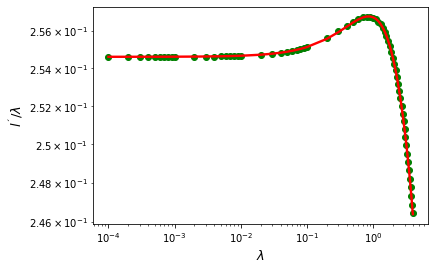

Maximum Percentage error= 0.0182 %


In [13]:
# Fitting of the the curve for the value of l^{'}/λ vs λ for the PBH binary without dark matter 
# halos.

x = np.array(λ_list)
y = np.array(l_list) 
Y = np.array(y/x)



z = np.polyfit(x, Y, 4)
p = np.poly1d(z)
print("p=",p)




plt.loglog(x,Y,'go')
plt.plot(x,p(x),'r')

plt.yscale('log')

plt.xlabel('$λ$',fontsize=13)
plt.ylabel('$l^{´}/λ$',fontsize=13)
plt.show()








#Calculation of the Maximum Percentage error in the numerical and fitted value of l^{´}/λ for
#PBH binary without dark matter halos.
Y_list = Y.tolist()
q= np.array(p(x))
q_list=q.tolist()

def percentage_error(numerical, fitted): 
    return (np.abs((numerical - fitted) / numerical)) * 100



error_list=np.zeros(len(λ_list))

for i, (Y,q) in enumerate(zip(Y_list,q_list)):
    error_list[i] = percentage_error(Y, q)    #Percentage error 


error_max=np.max(error_list)
print("Maximum Percentage error= "'%0.4f'%error_max,"%")

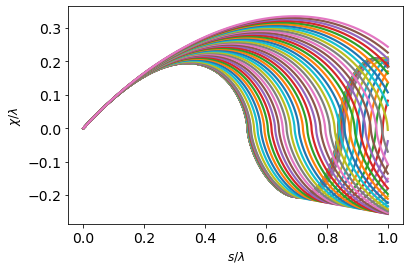

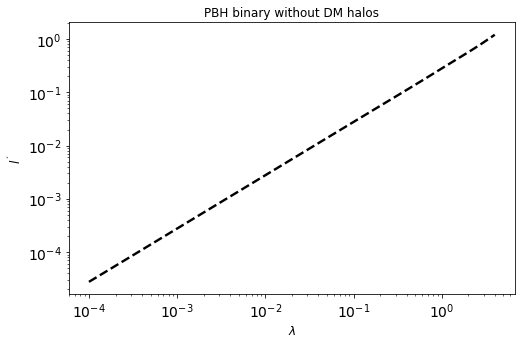

In [14]:
def integral(λ_0):
    def f(u,s,λ_0):
        return [u[1], -((s*g(s)+h(s))*((s*u[1]-u[0]))/(h(s)*s**2))-((u[0])/((((h(s)*s)**2))*λ_0
                     *((u[0]**2+b**2)**(3/2))))]    
    separation0= [1e-12,1]
    b= (3*λ_0)/100000
    ss= np.linspace(1e-12,(λ_0),1000000) 
    us= odeint(f,separation0,ss,args=( λ_0,))
    separations= us[:,0]
    As=ss/λ_0
    Bs=separations/λ_0
    plt.rc('lines', linewidth=2.2)
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)
    plt.plot(As,Bs,'')
    plt.xlabel('$s/λ$',fontsize=12)
    plt.ylabel('$χ/λ$',fontsize=12)
    χ=separations**2
    s_list=ss.tolist()
    H_list=np.zeros(len(s_list))
    for i, s in enumerate(s_list):
        H_list[i] = H(s)
    integrand=( χ*H_list)
    x=np.trapz(integrand,s_list)
    return x
     

l_list=np.zeros(len(λ_list))
for i, (λ_0) in enumerate(λ_list):
    l_list[i] = integral(λ_0)
    

    
    
    
plt.rc('lines', linewidth=2.4)    
plt.figure(figsize=(8,5))
plt.loglog(λ_list,l_list,'k--')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('$λ$',fontsize=12)
plt.ylabel('$l^{´}$',fontsize=12)
plt.title('PBH binary without DM halos')
plt.show()   

p=             5            4           3           2
-0.0004191 x + 0.004155 x - 0.01427 x + 0.02113 x - 0.009454 x + 0.2777


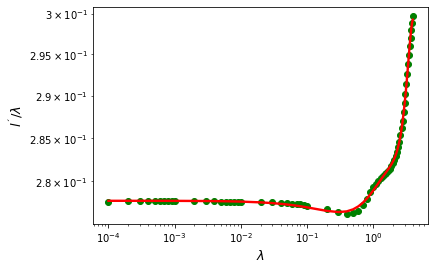

Maximum Percentage error= 0.1725 %


In [16]:
# Fitting of the the curve for the value of l^{'}/λ vs λ for the PBH binary without dark matter 
# halos.

x = np.array(λ_list)
y = np.array(l_list) 
Y = np.array(y/x)



z = np.polyfit(x, Y, 5)
p = np.poly1d(z)
print("p=",p)




plt.loglog(x,Y,'go')
plt.plot(x,p(x),'r')

plt.yscale('log')
plt.xlabel('$λ$',fontsize=13)
plt.ylabel('$l^{´}/λ$',fontsize=13)
plt.show()








#Calculation of the Maximum Percentage error in the numerical and fitted value of l^{´}/λ for
#PBH binary without dark matter halos.
Y_list = Y.tolist()
q= np.array(p(x))
q_list=q.tolist()

def percentage_error(numerical, fitted): 
    return (np.abs((numerical - fitted) / numerical)) * 100



error_list=np.zeros(len(λ_list))

for i, (Y,q) in enumerate(zip(Y_list,q_list)):
    error_list[i] = percentage_error(Y, q)    #Percentage error 


error_max=np.max(error_list)
print("Maximum Percentage error= "'%0.4f'%error_max,"%")

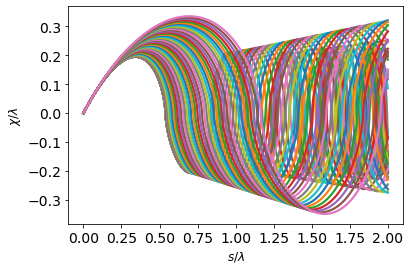

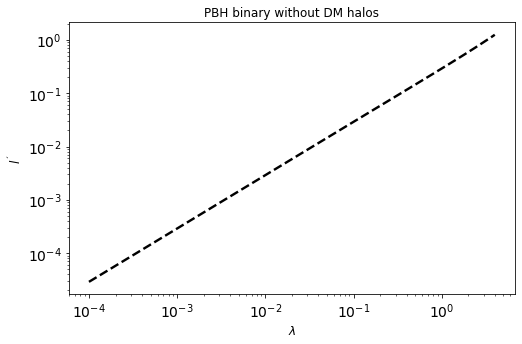

In [17]:
def integral(λ_0):
    def f(u,s,λ_0):
        return [u[1], -((s*g(s)+h(s))*((s*u[1]-u[0]))/(h(s)*s**2))-((u[0])/((((h(s)*s)**2))*λ_0
                     *((u[0]**2+b**2)**(3/2))))]    
    separation0= [1e-12,1]
    b= (3*λ_0)/100000
    ss= np.linspace(1e-12,(2*λ_0),1000000) 
    us= odeint(f,separation0,ss,args=( λ_0,))
    separations= us[:,0]
    As=ss/λ_0
    Bs=separations/λ_0
    plt.rc('lines', linewidth=2.2)
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)
    plt.plot(As,Bs,'')
    plt.xlabel('$s/λ$',fontsize=12)
    plt.ylabel('$χ/λ$',fontsize=12)
    χ=separations**2
    s_list=ss.tolist()
    H_list=np.zeros(len(s_list))
    for i, s in enumerate(s_list):
        H_list[i] = H(s)
    integrand=( χ*H_list)
    x=np.trapz(integrand,s_list)
    return x
     

l_list=np.zeros(len(λ_list))
for i, (λ_0) in enumerate(λ_list):
    l_list[i] = integral(λ_0)
    

    
    
    
plt.rc('lines', linewidth=2.4)    
plt.figure(figsize=(8,5))
plt.loglog(λ_list,l_list,'k--')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('$λ$',fontsize=12)
plt.ylabel('$l^{´}$',fontsize=12)
plt.title('PBH binary without DM halos')
plt.show()   

p=            4            3            2
0.0001165 x - 0.001375 x + 0.006503 x - 0.006402 x + 0.2906


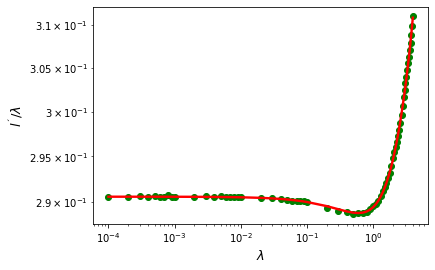

Maximum Percentage error= 0.1026 %


In [19]:
# Fitting of the the curve for the value of l^{'}/λ vs λ for the PBH binary without dark matter 
# halos.

x = np.array(λ_list)
y = np.array(l_list) 
Y = np.array(y/x)



z = np.polyfit(x, Y, 4)
p = np.poly1d(z)
print("p=",p)




plt.loglog(x,Y,'go')
plt.plot(x,p(x),'r')

plt.yscale('log')

plt.xlabel('$λ$',fontsize=13)
plt.ylabel('$l^{´}/λ$',fontsize=13)
plt.show()








#Calculation of the Maximum Percentage error in the numerical and fitted value of l^{´}/λ for
#PBH binary without dark matter halos.
Y_list = Y.tolist()
q= np.array(p(x))
q_list=q.tolist()

def percentage_error(numerical, fitted): 
    return (np.abs((numerical - fitted) / numerical)) * 100



error_list=np.zeros(len(λ_list))

for i, (Y,q) in enumerate(zip(Y_list,q_list)):
    error_list[i] = percentage_error(Y, q)    #Percentage error 


error_max=np.max(error_list)
print("Maximum Percentage error= "'%0.4f'%error_max,"%")

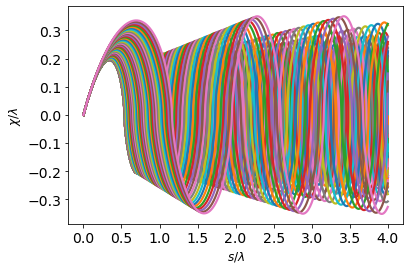

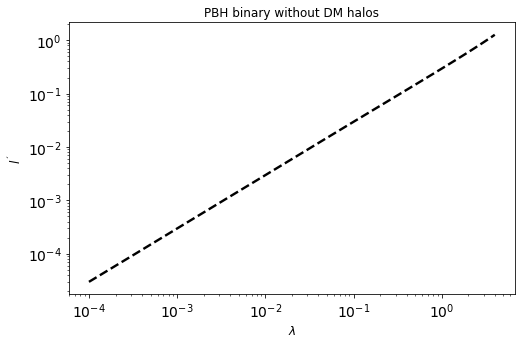

In [20]:
def integral(λ_0):
    def f(u,s,λ_0):
        return [u[1], -((s*g(s)+h(s))*((s*u[1]-u[0]))/(h(s)*s**2))-((u[0])/((((h(s)*s)**2))*λ_0
                     *((u[0]**2+b**2)**(3/2))))]    
    separation0= [1e-12,1]
    b= (3*λ_0)/100000
    ss= np.linspace(1e-12,(4*λ_0),1000000) 
    us= odeint(f,separation0,ss,args=( λ_0,))
    separations= us[:,0]
    As=ss/λ_0
    Bs=separations/λ_0
    plt.rc('lines', linewidth=2.2)
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)
    plt.plot(As,Bs,'')
    plt.xlabel('$s/λ$',fontsize=12)
    plt.ylabel('$χ/λ$',fontsize=12)
    χ=separations**2
    s_list=ss.tolist()
    H_list=np.zeros(len(s_list))
    for i, s in enumerate(s_list):
        H_list[i] = H(s)
    integrand=( χ*H_list)
    x=np.trapz(integrand,s_list)
    return x
     

l_list=np.zeros(len(λ_list))
for i, (λ_0) in enumerate(λ_list):
    l_list[i] = integral(λ_0)
    

    
    
    
plt.rc('lines', linewidth=2.4)    
plt.figure(figsize=(8,5))
plt.loglog(λ_list,l_list,'k--')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('$λ$',fontsize=12)
plt.ylabel('$l^{´}$',fontsize=12)
plt.title('PBH binary without DM halos')
plt.show()   

p=            4            3           2
0.0002399 x - 0.002489 x + 0.01026 x - 0.01171 x + 0.2975


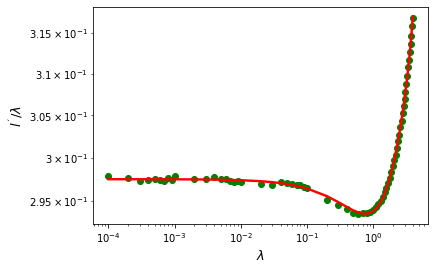

Maximum Percentage error= 0.1513 %


In [21]:
# Fitting of the the curve for the value of l^{'}/λ vs λ for the PBH binary without dark matter 
# halos.

x = np.array(λ_list)
y = np.array(l_list) 
Y = np.array(y/x)



z = np.polyfit(x, Y, 4)
p = np.poly1d(z)
print("p=",p)




plt.loglog(x,Y,'go')
plt.plot(x,p(x),'r')

plt.yscale('log')

plt.xlabel('$λ$',fontsize=13)
plt.ylabel('$l^{´}/λ$',fontsize=13)
plt.show()








#Calculation of the Maximum Percentage error in the numerical and fitted value of l^{´}/λ for
#PBH binary without dark matter halos.
Y_list = Y.tolist()
q= np.array(p(x))
q_list=q.tolist()

def percentage_error(numerical, fitted): 
    return (np.abs((numerical - fitted) / numerical)) * 100



error_list=np.zeros(len(λ_list))

for i, (Y,q) in enumerate(zip(Y_list,q_list)):
    error_list[i] = percentage_error(Y, q)    #Percentage error 


error_max=np.max(error_list)
print("Maximum Percentage error= "'%0.4f'%error_max,"%")

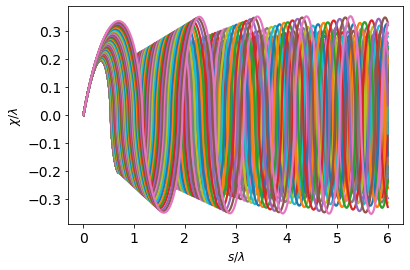

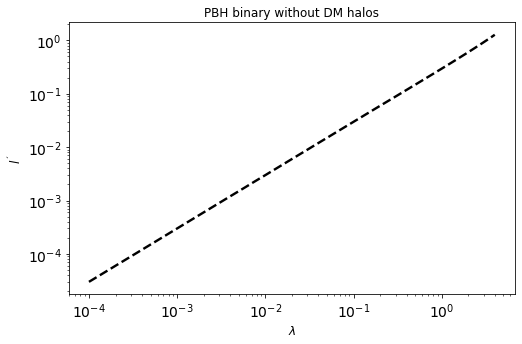

In [22]:
def integral(λ_0):
    def f(u,s,λ_0):
        return [u[1], -((s*g(s)+h(s))*((s*u[1]-u[0]))/(h(s)*s**2))-((u[0])/((((h(s)*s)**2))*λ_0
                     *((u[0]**2+b**2)**(3/2))))]    
    separation0= [1e-12,1]
    b= (3*λ_0)/100000
    ss= np.linspace(1e-12,(6*λ_0),1000000)   #s_final=6*λ_0
    us= odeint(f,separation0,ss,args=( λ_0,))
    separations= us[:,0]
    As=ss/λ_0
    Bs=separations/λ_0
    plt.rc('lines', linewidth=2.2)
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)
    plt.plot(As,Bs,'')
    plt.xlabel('$s/λ$',fontsize=12)
    plt.ylabel('$χ/λ$',fontsize=12)
    χ=separations**2
    s_list=ss.tolist()
    H_list=np.zeros(len(s_list))
    for i, s in enumerate(s_list):
        H_list[i] = H(s)
    integrand=( χ*H_list)
    x=np.trapz(integrand,s_list)
    return x
     

l_list=np.zeros(len(λ_list))
for i, (λ_0) in enumerate(λ_list):
    l_list[i] = integral(λ_0)
    

    
    
    
plt.rc('lines', linewidth=2.4)    
plt.figure(figsize=(8,5))
plt.loglog(λ_list,l_list,'k--')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('$λ$',fontsize=12)
plt.ylabel('$l^{´}$',fontsize=12)
plt.title('PBH binary without DM halos')
plt.show()   

p=            4            3           2
0.0003622 x - 0.003588 x + 0.01366 x - 0.0158 x + 0.3002


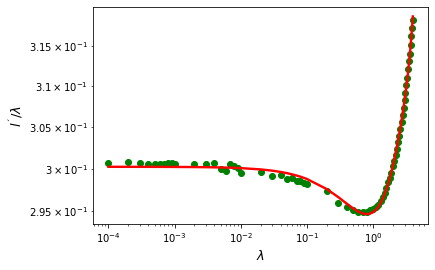

Maximum Percentage error= 0.2356 %


In [23]:
# Fitting of the the curve for the value of l^{'}/λ vs λ for the PBH binary without dark matter 
# halos.

x = np.array(λ_list)
y = np.array(l_list) 
Y = np.array(y/x)



z = np.polyfit(x, Y, 4)
p = np.poly1d(z)
print("p=",p)




plt.loglog(x,Y,'go')
plt.plot(x,p(x),'r')

plt.yscale('log')

plt.xlabel('$λ$',fontsize=13)
plt.ylabel('$l^{´}/λ$',fontsize=13)
plt.show()








#Calculation of the Maximum Percentage error in the numerical and fitted value of l^{´}/λ for
#PBH binary without dark matter halos.
Y_list = Y.tolist()
q= np.array(p(x))
q_list=q.tolist()

def percentage_error(numerical, fitted): 
    return (np.abs((numerical - fitted) / numerical)) * 100



error_list=np.zeros(len(λ_list))

for i, (Y,q) in enumerate(zip(Y_list,q_list)):
    error_list[i] = percentage_error(Y, q)    #Percentage error 


error_max=np.max(error_list)
print("Maximum Percentage error= "'%0.4f'%error_max,"%")

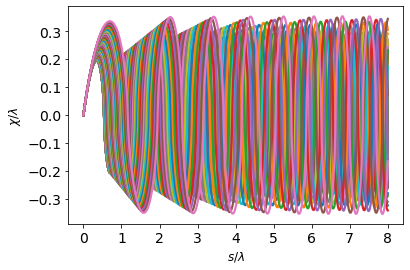

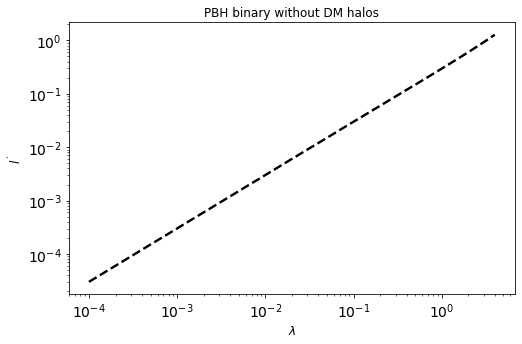

In [24]:
def integral(λ_0):
    def f(u,s,λ_0):
        return [u[1], -((s*g(s)+h(s))*((s*u[1]-u[0]))/(h(s)*s**2))-((u[0])/((((h(s)*s)**2))*λ_0
                     *((u[0]**2+b**2)**(3/2))))]    
    separation0= [1e-12,1]
    b= (3*λ_0)/100000
    ss= np.linspace(1e-12,(8*λ_0),1000000)   #s_final=8*λ_0
    us= odeint(f,separation0,ss,args=( λ_0,))
    separations= us[:,0]
    As=ss/λ_0
    Bs=separations/λ_0
    plt.rc('lines', linewidth=2.2)
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)
    plt.plot(As,Bs,'')
    plt.xlabel('$s/λ$',fontsize=12)
    plt.ylabel('$χ/λ$',fontsize=12)
    χ=separations**2
    s_list=ss.tolist()
    H_list=np.zeros(len(s_list))
    for i, s in enumerate(s_list):
        H_list[i] = H(s)
    integrand=( χ*H_list)
    x=np.trapz(integrand,s_list)
    return x
     

l_list=np.zeros(len(λ_list))
for i, (λ_0) in enumerate(λ_list):
    l_list[i] = integral(λ_0)
    

    
    
    
plt.rc('lines', linewidth=2.4)    
plt.figure(figsize=(8,5))
plt.loglog(λ_list,l_list,'k--')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('$λ$',fontsize=12)
plt.ylabel('$l^{´}$',fontsize=12)
plt.title('PBH binary without DM halos')
plt.show()   

p=           4            3           2
0.000346 x - 0.003512 x + 0.01377 x - 0.01659 x + 0.3014


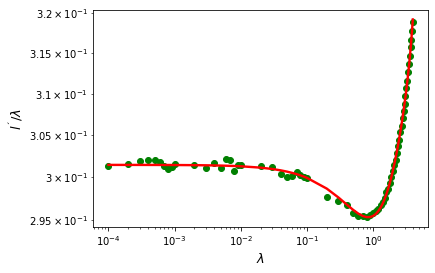

Maximum Percentage error= 0.3306 %


In [25]:
# Fitting of the the curve for the value of l^{'}/λ vs λ for the PBH binary without dark matter 
# halos.

x = np.array(λ_list)
y = np.array(l_list) 
Y = np.array(y/x)



z = np.polyfit(x, Y, 4)
p = np.poly1d(z)
print("p=",p)




plt.loglog(x,Y,'go')
plt.plot(x,p(x),'r')

plt.yscale('log')

plt.xlabel('$λ$',fontsize=13)
plt.ylabel('$l^{´}/λ$',fontsize=13)
plt.show()








#Calculation of the Maximum Percentage error in the numerical and fitted value of l^{´}/λ for
#PBH binary without dark matter halos.
Y_list = Y.tolist()
q= np.array(p(x))
q_list=q.tolist()

def percentage_error(numerical, fitted): 
    return (np.abs((numerical - fitted) / numerical)) * 100



error_list=np.zeros(len(λ_list))

for i, (Y,q) in enumerate(zip(Y_list,q_list)):
    error_list[i] = percentage_error(Y, q)    #Percentage error 


error_max=np.max(error_list)
print("Maximum Percentage error= "'%0.4f'%error_max,"%")